

# Project: Investigate a Dataset - No show appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset shows information from 100k medical appointments in Brazil and is formed on the question of whether or nor paitents show up for their appointments.


### Question(s) for Analysis
(1) Does Patients having hypertension make them show up?

(2) Does receiving sms make patients show up?

(3) Does receiving the scholarship make paitents show up?

(4) Does being male or female affect showing up for appointments?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling



In [2]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


the data is messey and needs to be cleaned. column names are both in upper case and lower case, so i have to clean it to all lower so that everything will be consistent

### Data Cleaning

 

In [3]:
df.columns = df.columns.str.lower().str.replace('-','_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ','_')

i made every column of the dataset to be uniform. they all should be in lower case and i replaced a dash with an underscore. all these i did for easy reading and typing

In [4]:
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,f,2016-04-29t18:38:08z,2016-04-29t00:00:00z,62,jardim_da_penha,0,1,0,0,0,0,no
1,5.589978e+14,5642503,m,2016-04-29t16:08:27z,2016-04-29t00:00:00z,56,jardim_da_penha,0,0,0,0,0,0,no
2,4.262962e+12,5642549,f,2016-04-29t16:19:04z,2016-04-29t00:00:00z,62,mata_da_praia,0,0,0,0,0,0,no
3,8.679512e+11,5642828,f,2016-04-29t17:29:31z,2016-04-29t00:00:00z,8,pontal_de_camburi,0,0,0,0,0,0,no
4,8.841186e+12,5642494,f,2016-04-29t16:07:23z,2016-04-29t00:00:00z,56,jardim_da_penha,0,1,1,0,0,0,no


now everything is exactly the way i want it.

the patients id and the appointment id columns are not necessary for this analysis... as there are just a bunch of random number...so it has to be droped!

In [5]:
#drop paitent id and appointment id
df= df.drop(['patientid','appointmentid'],axis=1)

In [6]:
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,f,2016-04-29t18:38:08z,2016-04-29t00:00:00z,62,jardim_da_penha,0,1,0,0,0,0,no
1,m,2016-04-29t16:08:27z,2016-04-29t00:00:00z,56,jardim_da_penha,0,0,0,0,0,0,no
2,f,2016-04-29t16:19:04z,2016-04-29t00:00:00z,62,mata_da_praia,0,0,0,0,0,0,no
3,f,2016-04-29t17:29:31z,2016-04-29t00:00:00z,8,pontal_de_camburi,0,0,0,0,0,0,no
4,f,2016-04-29t16:07:23z,2016-04-29t00:00:00z,56,jardim_da_penha,0,1,1,0,0,0,no


## Exploratory Data Analysis




In [7]:
df.shape

(110527, 12)

there are 110527 rows and 12 columns in the dataset

Next we check for missing values

In [8]:
df.isnull().sum()

gender            0
scheduledday      0
appointmentday    0
age               0
neighbourhood     0
scholarship       0
hipertension      0
diabetes          0
alcoholism        0
handcap           0
sms_received      0
no_show           0
dtype: int64

There are no missing values in our data set.

Next, i check the statistical summary of the dataset

In [9]:
df.describe()

,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


the average age of paitent is 37years.

the minimum age here is -1, that is abnormal, so that row will have to be dropped.

the max age is 115. that looks like an outlier.

In [10]:
#first we find the row with age== -1 and drop it
df[df.age == -1]

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
99832,f,2016-06-06t08:58:13z,2016-06-06t00:00:00z,-1,romão,0,0,0,0,0,0,no


In [11]:
df = df.drop([99832])

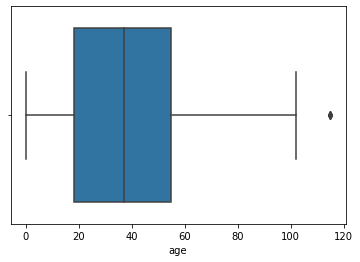

In [12]:
sns.boxplot(x='age',data=df);

next i will create the histogram of the entire dataset

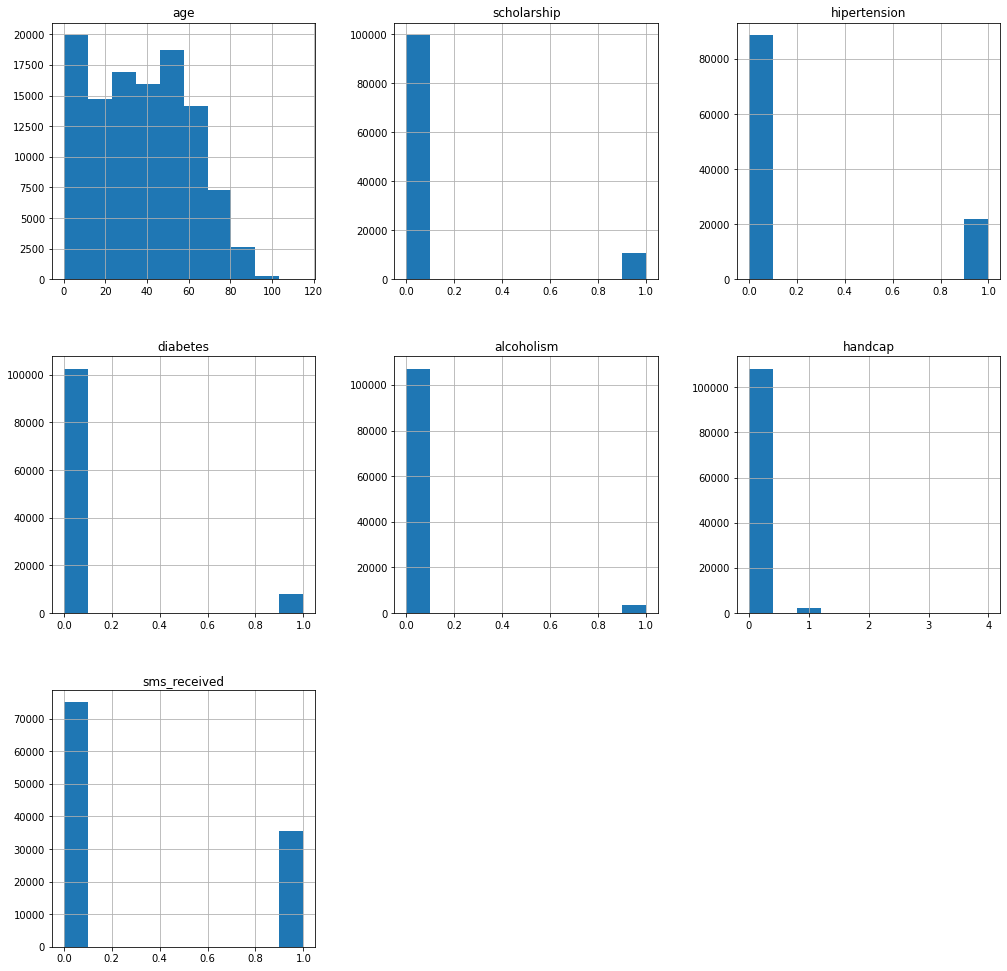

In [13]:
df.hist(figsize=(17,17));

the Age column is the only continuous variable in the dataset. the rest are classified into 0 and 1

i will create a countplot of the target column, to see how they are distributed

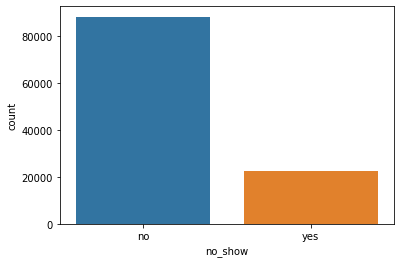

In [14]:
sns.countplot(x='no_show', data=df);

from the graph above, there is a huge class imbalace..as thee are more people that show up to appointment, than those that dont.

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


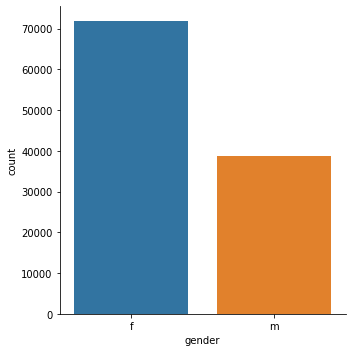

In [15]:
sns.catplot('gender',data=df,kind='count')

there are equally more females than male. 

### Research Question 1: how does gender show if patient show up or not?

In [16]:
def catplot(column,hue):
    '''function that returns the seaborn catplot
    '''
    ax = sns.catplot(x=column,data=df, hue=hue, kind='count')
    #ax.set_title('What gender showed up most')
    #ax.fig.suptitle('What gender showed up most')
    
    return ax
    
        
    
    

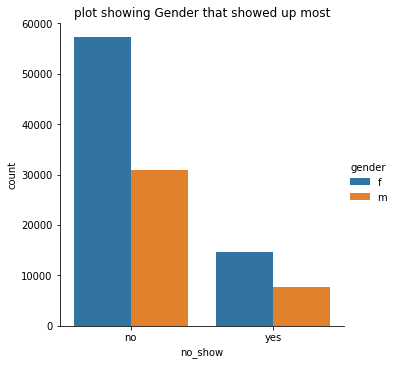

In [17]:
catplot('no_show','gender').set(title='plot showing Gender that showed up most');

it shows that more female show up for appointment than male. almost 50% more than men. and there are more females in our dataset.

### Question 2: Does patient having hipertension make then show up?

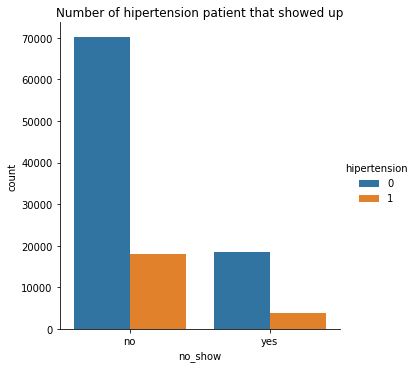

In [18]:
catplot('no_show','hipertension').set(title='Number of hipertension patient that showed up');

people that had hypertension showed up more than those that didnt.

### Question 3: Does recieving sms make paitent show up?

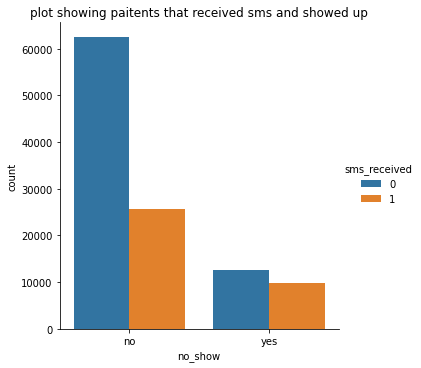

In [19]:
catplot('no_show','sms_received').set(title='plot showing paitents that received sms and showed up');

receiving sms alert helped paitent show up for their appointments

### Question 4: Does recieving the scholarship affect showing up?


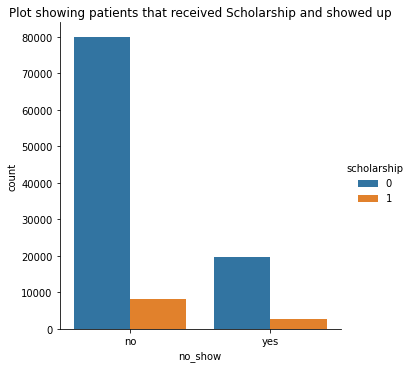

In [20]:
#did having a scholarship have effect on showing up or not?
catplot('no_show','scholarship').set(title='Plot showing patients that received Scholarship and showed up');

people with scholarship really showed up for their appointments

<a id='conclusions'></a>
## Conclusions
while exploring and analysing the No-show appointment dataset, i loaded the data using pandas and going through the dataset, there were no missing values. 
there weere columns in the dataset that will not help in our analysis like the 'paitientId' and the 'AppointmentId' columns. since these are a bunch of random numbers i dropped them from the dataset.


From the analysis, the average age of the patients is 37years. and there are more females than males. Futhermore, my analysis shows there are more people that showed p for the appointment than thse that didnt and they were mostly females.

we discovered that patients who recieve sms alert, have hypertension, are on scholarship and are also females, tend to show up more for their appointments.
i also discovered that those who had the Scholarship showed up more with a count of approximately 80,000 according to the catplot on Research question 4.

## Limitations:
(1) Sampling Bias: there were more females than males in the dataset. and balancing this out may lead to different results and insights.

(2) There were some hindrances like where a patients age was less than one. i had to drop it as its not a usual age.



